## Data Exploration

**1. Find our experiment records**

In [1]:
!rm data2/.DS_Store
from os import listdir
from os.path import isfile, join
data_raw = [f for f in listdir("data2") if isfile(join("data2", f))]
print(len(data_raw), "files:", str(data_raw))

rm: data2/.DS_Store: No such file or directory
8 files: ['46.8.csv', '21.8.csv', '18.3.csv', '53.8.csv', '13.9.csv', '58.6.csv', '19.7.csv', '39.1.csv']


**2. Save into a dictionary**

In [9]:
import csv
import numpy as np
data = {}
for experiment in data_raw:
    t, temp = [], []
    with open("data2/"+experiment) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            t.append(int(row[0])/1e3)
            temp.append(float(row[1]))
        data[experiment[:-4]] = (np.array(t[:200]), np.array(temp[:200]))

**3. Plot**

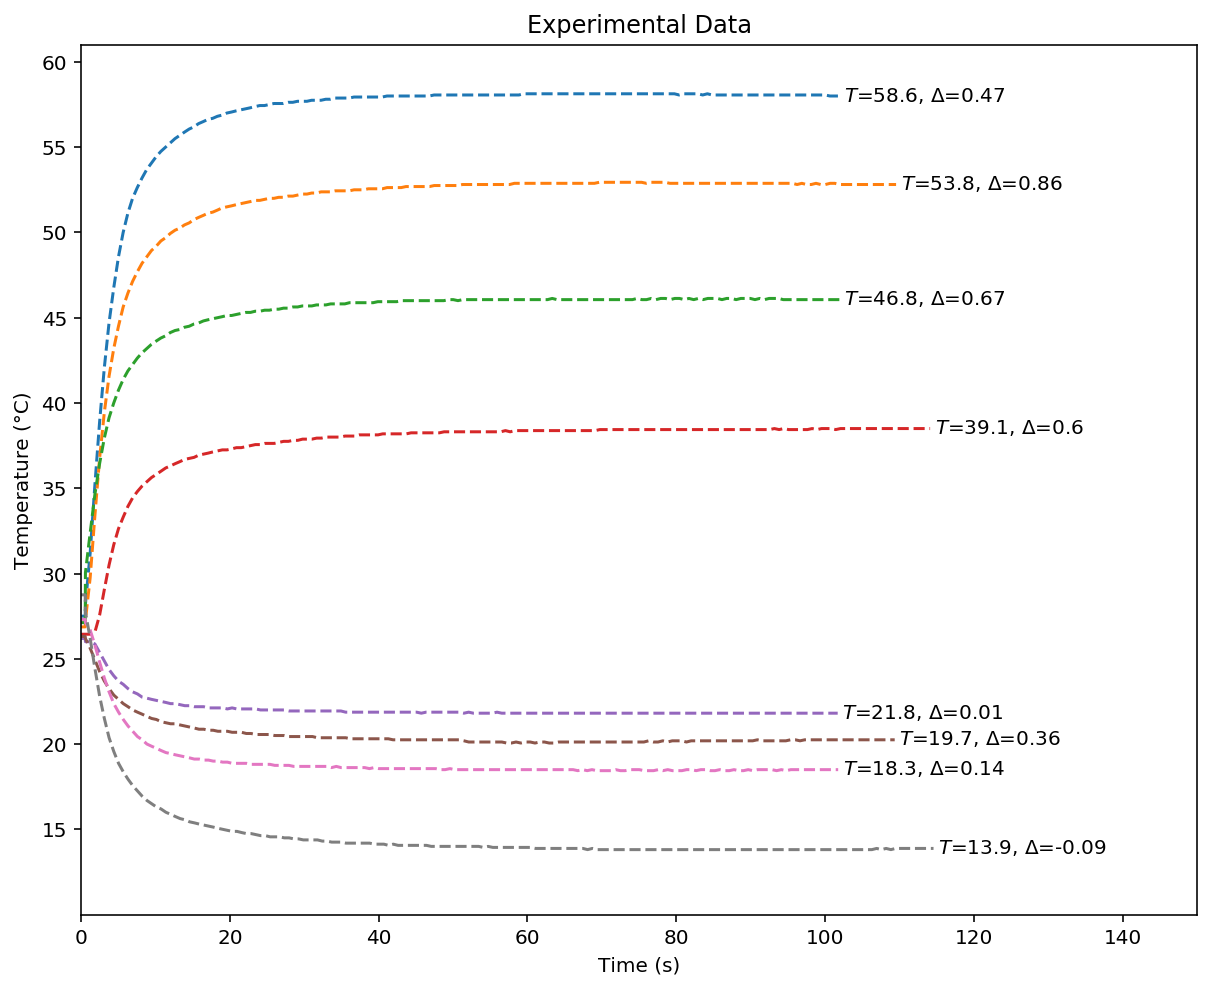

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(1, figsize=(10, 8))
plt.title("Experimental Data")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.xticks(np.arange(0, 160, step=20))
plt.xlim(0,150)
plt.ylim(10,61)
plt.yticks(np.arange(15, 61, step=5))

ordered_experiments = list(data.keys())
ordered_experiments.sort()
for experiment in ordered_experiments[::-1]:
    t, temp = data[experiment]
    plt.plot(t, temp, '--', label=r"$T_i$="+experiment)
    if float(experiment) < 28:
        label = round(temp.min() - float(experiment), 2)
    else:
        label = round(float(experiment) - temp.max(), 2)
    plt.text(t[-1]+0.6,temp[-1]-0.3, r"$T$="+experiment+r", $\Delta$="+str(label))
    #plt.axhline(y=float(experiment), linestyle='--')
#plt.legend()
plt.show()

In [37]:
t_list = []
keys = []
for experiment in data.keys():
    keys.append(float(experiment))
    t, temp = data[experiment]
    t_ = [(t[x]-t[x-7]) for x in range(30,40)]
    print("time:", t[30], t[40])
    t_sum = sum(t_)/len(t_)
    t_list.append(t_sum)

time: 6.933 13.272
time: 6.949 13.307
time: 6.95 13.312
time: 6.932 13.268
time: 6.953 13.318
time: 7.563 13.896
time: 6.95 13.309
time: 6.941 13.284


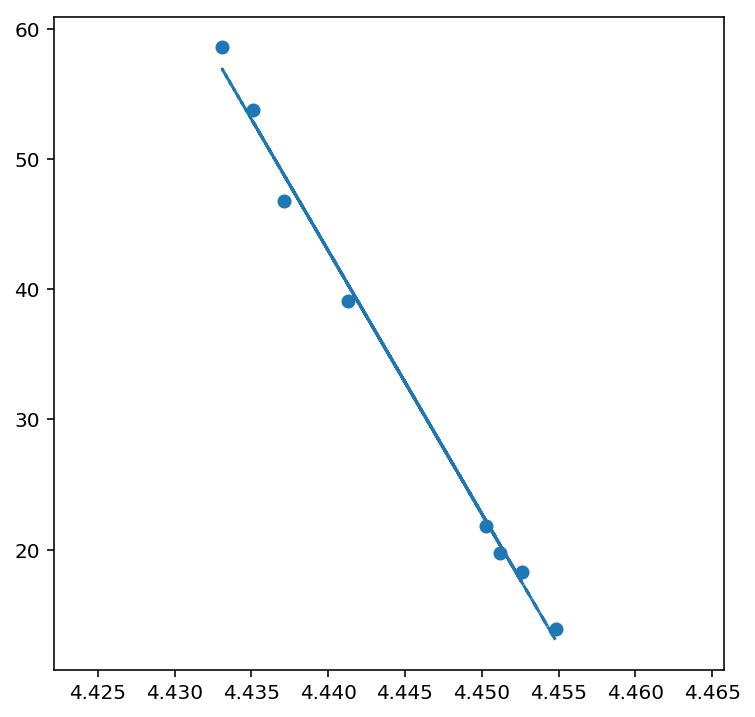

Equation: temp = [-2021.24105292] ?? + [9017.27953212]
Mean squared error: 1.404
Variance score: 0.995


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

targets, temps = np.array(keys).reshape(-1, 1), np.array(t_list).reshape(-1, 1)

regr = LinearRegression()
regr.fit(temps, targets)
t_pred = regr.predict(temps)

plt.figure(2, figsize=(6, 6))
plt.scatter(temps, targets)
plt.plot(temps, t_pred, '--')
plt.show()

print("Equation: temp =", regr.coef_[0], "?? +", regr.predict([[0]])[0])
print("Mean squared error: %.3f" % mean_squared_error(targets, t_pred))
print('Variance score: %.3f' % r2_score(targets, t_pred)) # 1 is perfect prediction